# Pima Indians Diabetes Database

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, **all patients here are females at least 21 years old of Pima Indian heritage**.

The datasets consists of several medical predictor variables and one target variable, **Outcome**. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on.

We build a **machine learning model** to accurately predict whether or not the patients in the dataset have **diabetes or not.**

- **Pregnancies**: Number of times pregnant
- **Glucose**: Plasma glucose concentration a 2 hours in an oral glucose tolerance test
- **BloodPressure**: Diastolic blood pressure (mm Hg)
- **SkinThickness**: Triceps skin fold thickness (mm)
- **Insulin**: 2-Hour serum insulin (mu U/ml)
- **BMI**: Body mass index (weight in kg/(height in m)^2)
- **DiabetesPedigreeFunction**: Diabetes pedigree function
- **Age**: Age (years)
- **Outcome**: Class variable (0 or 1) 268 of 768 are 1, the others are 0

# General Information on Variables

## 1.Glucose Tolerance Test
It is a blood test that involves taking multiple blood samples over time, usually 2 hours.It used to diagnose diabetes. The results can be classified as normal, impaired, or abnormal. 
* **Normal Results for Diabetes ->** Two-hour glucose level less than 140 mg/dL

* **Impaired Results for Diabetes ->** Two-hour glucose level 140 to 200 mg/dL 

* **Abnormal (Diagnostic) Results for Diabetes ->** Two-hour glucose level greater than 200 mg/dL



## 2.BloodPressure
The diastolic reading, or the bottom number, is the pressure in the arteries when the heart rests between beats. This is the time when the heart fills with blood and gets oxygen. A normal diastolic blood pressure is lower than 80. A reading of 90 or higher means you have high blood pressure.

* **Normal**: Systolic below 120 and diastolic below 80
* **Elevated**: Systolic 120–129 and diastolic under 80
* **Hypertension stage 1**: Systolic 130–139 and diastolic 80–89
* **Hypertension stage 2**: Systolic 140-plus and diastolic 90 or more
* **Hypertensive crisis**: Systolic higher than 180 and diastolic above 120.

## 3.BMI

The standard weight status categories associated with BMI ranges for adults are shown in the following table.

* Below 18.5 -> **Underweight**
* 18.5 – 24.9 -> **Normal or Healthy Weight**
* 25.0 – 29.9 -> **Overweight**
* 30.0 and Above -> **Obese**

## 4.Triceps Skinfolds 
For adults, the standard normal values for triceps skinfolds are: 
* 2.5mm (men) 
* 18.0mm (women)

In [381]:
#importing the necessary libraries
import warnings
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import RobustScaler
import numpy as np
from lightgbm import LGBMClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, \
    classification_report
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
warnings.simplefilter(action="ignore")

In [328]:
#reading the data set
df = pd.read_csv("../input/pima-indians-diabetes-database/diabetes.csv")

## Exploratory Data Analysis

In [329]:
# To display the top 5 rows
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [330]:
# To display the bottom 5 rows
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [331]:
# total number of rows and columns
# Dataset comprises of 768 observations and 9 characteristics.
# Out of which one is dependent variable and rest 8 are independent variables
df.shape

(768, 9)

In [332]:
# Data has only float and integer values
# No variable column has null/missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [333]:
# Getting various summary statistics
# There is notably a large difference between 99% and max values of predictors “Insulin”,”SkinThickness”,”DiabetesPedigreeFunction”
# There are extreme values-Outliers in our data set
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,79.00000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,38.70000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,21.80000,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.14035,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [334]:
# Target variable categorical
df.Outcome.unique()

array([1, 0])

In [335]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

## Data Visualization

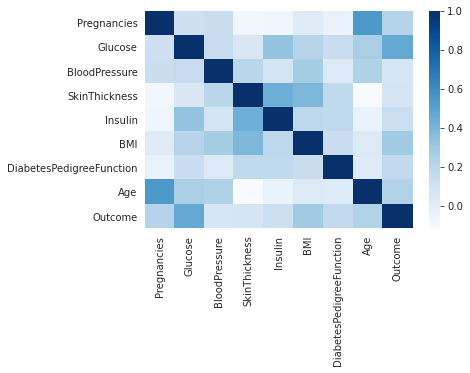

In [336]:
plt.figure(figsize=(6,4))
sns.heatmap(df.corr(),cmap='Blues',annot=False)

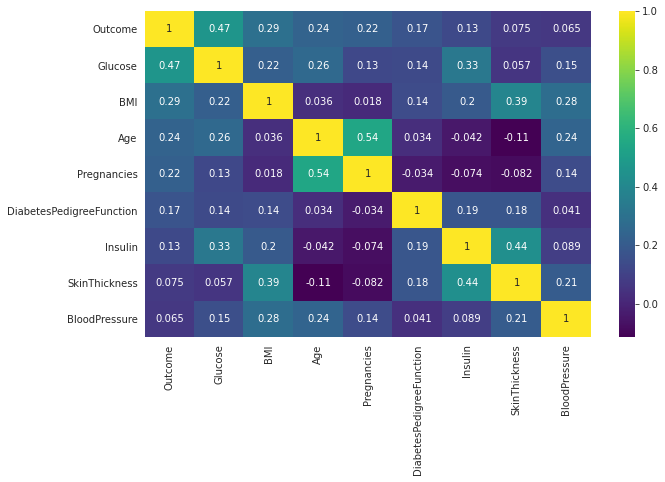

In [337]:
#Outcome correlation matrix
k = 9 #number of variables for heatmap
cols = df.corr().nlargest(k, 'Outcome')['Outcome'].index
cm = df[cols].corr()
plt.figure(figsize=(10,6))
sns.heatmap(cm, annot=True, cmap = 'viridis')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f30f1cda510>,
      dtype=object)

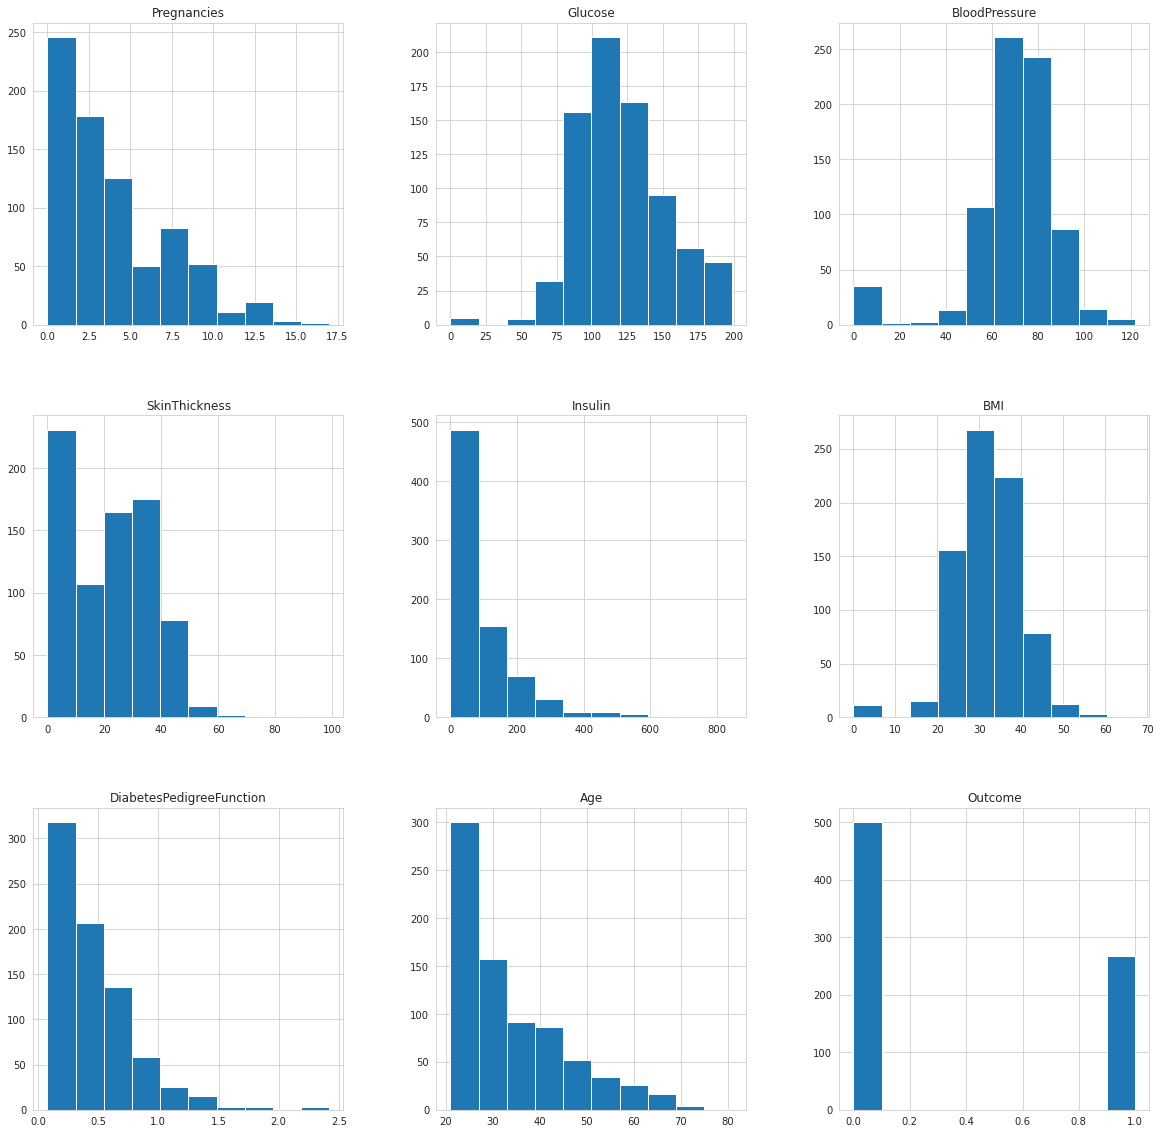

In [338]:
# see how the data is distributed.
df.hist(figsize = (20,20))

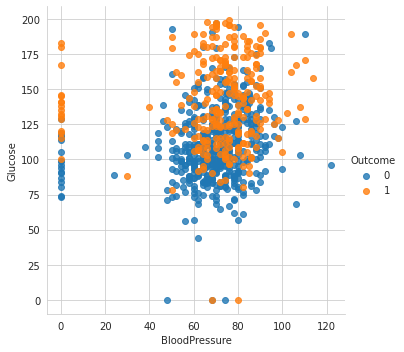

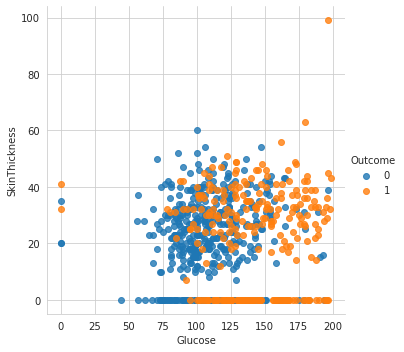

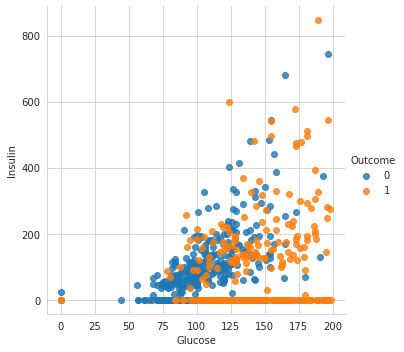

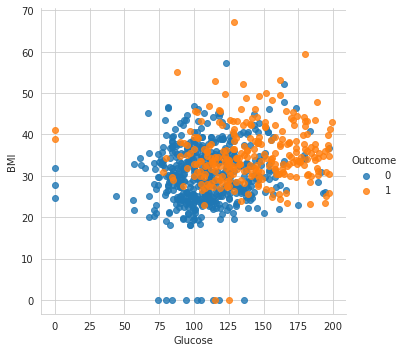

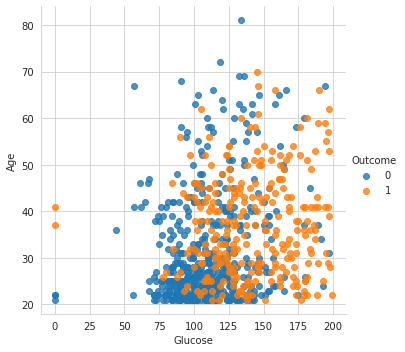

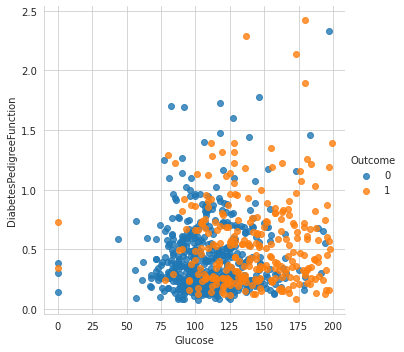

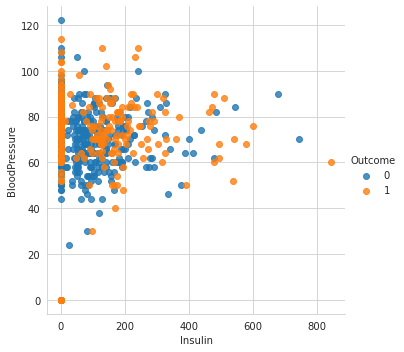

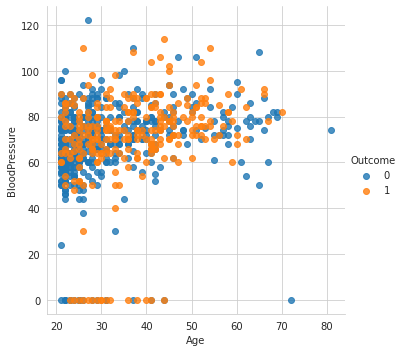

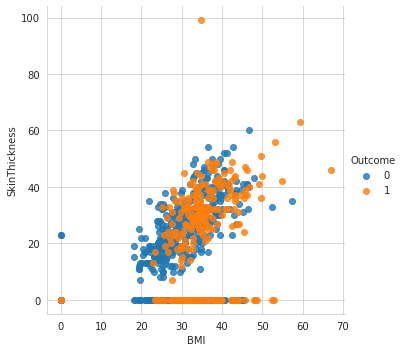

In [339]:
# A scatter plot for show how two variables are related to each other
sns.lmplot("BloodPressure", "Glucose", df, hue='Outcome', fit_reg=False, height = 5)
sns.lmplot("Glucose", "SkinThickness", df, hue='Outcome', fit_reg=False, height = 5)
sns.lmplot("Glucose", "Insulin", df, hue='Outcome', fit_reg=False, height = 5)
sns.lmplot("Glucose", "BMI", df, hue='Outcome', fit_reg=False, height = 5)
sns.lmplot("Glucose", "Age", df, hue='Outcome', fit_reg=False, height = 5)
sns.lmplot("Glucose", "DiabetesPedigreeFunction", df, hue='Outcome', fit_reg=False, height = 5)
sns.lmplot("Insulin","BloodPressure",df, hue='Outcome', fit_reg=False, height = 5)
sns.lmplot("Age", "BloodPressure", df, hue='Outcome', fit_reg=False, height = 5)
sns.lmplot("BMI", "SkinThickness", df, hue='Outcome', fit_reg=False, height = 5)

## DATA PREPROCESSING

In [340]:
#Observation units for variables with a minimum value of zero are NaN, except for the pregnancy variable.
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,79.00000,99.00000,117.0000,140.25000,167.0000,181.00000,196.00000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,38.70000,62.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,0.00000,23.0000,32.00000,40.0000,44.00000,51.33000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,0.00000,30.5000,127.25000,210.0000,293.00000,519.90000,846.00
BMI,768.0,31.992578,7.884160,0.000,21.80000,27.30000,32.0000,36.60000,41.5000,44.39500,50.75900,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.14035,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,2.42
Age,768.0,33.240885,11.760232,21.000,21.00000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.00


In [341]:
# NaN values of 0 for Glucose, Blood Pressure, Skin Thickness, Insulin, BMI
# We can write Nan instead of 0
cols = ["Glucose", "BloodPressure", "SkinThickness", "Insulin", "BMI"]
for col in cols:
    df[col].replace(0,np.NaN,inplace=True)

In [342]:
# now we can see missing values
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [343]:
# We can fill in NaN values with a median according to the target
for col in df.columns:
    df.loc[(df["Outcome"]==0) & (df[col].isnull()),col] = df[df["Outcome"]==0][col].median()
    df.loc[(df["Outcome"]==1) & (df[col].isnull()),col] = df[df["Outcome"]==1][col].median()

In [344]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [345]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.10)
    quartile3 = dataframe[variable].quantile(0.90)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit

In [346]:
def has_outliers(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    if dataframe[(dataframe[variable] < low_limit) | (dataframe[variable] > up_limit)].any(axis=None):
        print(variable, "yes")

In [347]:
for col in df.columns:
    has_outliers(df, col)

SkinThickness yes
Insulin yes
DiabetesPedigreeFunction yes


In [348]:
def replace_with_thresholds(dataframe, numeric_columns):
    for variable in numeric_columns:
        low_limit, up_limit = outlier_thresholds(dataframe, variable)
        dataframe.loc[(dataframe[variable] < low_limit), variable] = low_limit
        dataframe.loc[(dataframe[variable] > up_limit), variable] = up_limit

In [349]:
replace_with_thresholds(df, df.columns)

In [350]:
for col in df.columns:
    has_outliers(df, col)

In [351]:
df.describe([0.05,0.25,0.50,0.75,0.90,0.95,0.99]).T

,count,mean,std,min,5%,25%,50%,75%,90%,95%,99%,max
Pregnancies,768.0,3.845052,3.369578,0.000,0.00000,1.00000,3.0000,6.00000,9.0000,10.00000,13.00000,17.000
Glucose,768.0,121.677083,30.464161,44.000,80.00000,99.75000,117.0000,140.25000,167.0000,181.00000,196.00000,199.000
BloodPressure,768.0,72.389323,12.106039,24.000,52.00000,64.00000,72.0000,80.00000,88.0000,90.00000,106.00000,122.000
SkinThickness,768.0,29.055990,8.671056,7.000,14.35000,25.00000,28.0000,32.00000,40.0000,44.00000,51.33000,73.000
Insulin,768.0,138.839844,75.233052,14.000,50.00000,102.50000,102.5000,169.50000,210.0000,293.00000,424.50000,424.500
BMI,768.0,32.434635,6.880498,18.200,22.23500,27.50000,32.0500,36.60000,41.5000,44.39500,50.75900,67.100
DiabetesPedigreeFunction,768.0,0.470082,0.322171,0.078,0.14035,0.24375,0.3725,0.62625,0.8786,1.13285,1.69833,1.949
Age,768.0,33.240885,11.760232,21.000,21.00000,24.00000,29.0000,41.00000,51.0000,58.00000,67.00000,81.000
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.00000,0.0000,1.00000,1.0000,1.00000,1.00000,1.000


## FEATURE ENGINEERING

In [352]:
df['New_Glucose_Class'] = pd.cut(x=df['Glucose'], bins=[0,139,200],labels = ["Normal","Prediabetes"])

In [353]:
df['New_BMI_Range'] = pd.cut(x=df['BMI'], bins=[0,18.5,24.9,29.9,100],labels = ["Underweight","Healty","Overweight","Obese"])

In [354]:
df['New_BloodPressure'] = pd.cut(x=df['BloodPressure'], bins=[0,79,89,123],labels = ["Normal","HS1","HS2"])

In [355]:
df['New_SkinThickness'] = df['SkinThickness'].apply(lambda x: 1 if x <= 18.0 else 0)

In [356]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class,New_BMI_Range,New_BloodPressure,New_SkinThickness
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1.0,Prediabetes,Obese,Normal,0
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0.0,Normal,Overweight,Normal,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1.0,Prediabetes,Healty,Normal,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,Normal,Overweight,Normal,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.949,33.0,1.0,Normal,Obese,Normal,0


In [323]:
def one_hot_encoder(dataframe, categorical_columns, nan_as_category=False):
    original_columns = list(dataframe.columns)
    dataframe = pd.get_dummies(dataframe, columns=categorical_columns,
                               dummy_na=nan_as_category, drop_first=True)
    new_columns = [col for col in dataframe.columns if col not in original_columns]
    return dataframe, new_columns

['New_Glucose_Class_Prediabetes',
 'New_BMI_Range_Healty',
 'New_BMI_Range_Overweight',
 'New_BMI_Range_Obese',
 'New_BloodPressure_HS1',
 'New_BloodPressure_HS2',
 'New_SkinThickness_1']

In [358]:
categorical_columns = [col for col in df.columns
                           if len(df[col].unique()) <= 10
                      and col != "Outcome"]
categorical_columns

['New_Glucose_Class',
 'New_BMI_Range',
 'New_BloodPressure',
 'New_SkinThickness']

In [359]:
df, new_cols_ohe = one_hot_encoder(df,categorical_columns)
new_cols_ohe

['New_Glucose_Class_Prediabetes',
 'New_BMI_Range_Healty',
 'New_BMI_Range_Overweight',
 'New_BMI_Range_Obese',
 'New_BloodPressure_HS1',
 'New_BloodPressure_HS2',
 'New_SkinThickness_1']

In [360]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class_Prediabetes,New_BMI_Range_Healty,New_BMI_Range_Overweight,New_BMI_Range_Obese,New_BloodPressure_HS1,New_BloodPressure_HS2,New_SkinThickness_1
0,6.0,148.0,72.0,35.0,169.5,33.6,0.627,50.0,1.0,1,0,0,1,0,0,0
1,1.0,85.0,66.0,29.0,102.5,26.6,0.351,31.0,0.0,0,0,1,0,0,0,0
2,8.0,183.0,64.0,32.0,169.5,23.3,0.672,32.0,1.0,1,1,0,0,0,0,0
3,1.0,89.0,66.0,23.0,94.0,28.1,0.167,21.0,0.0,0,0,1,0,0,0,0
4,0.0,137.0,40.0,35.0,168.0,43.1,1.949,33.0,1.0,0,0,0,1,0,0,0


In [361]:
def robust_scaler(variable):
    var_median = variable.median()
    quartile1 = variable.quantile(0.25)
    quartile3 = variable.quantile(0.75)
    interquantile_range = quartile3 - quartile1
    if int(interquantile_range) == 0:
        quartile1 = variable.quantile(0.05)
        quartile3 = variable.quantile(0.95)
        interquantile_range = quartile3 - quartile1
        if int(interquantile_range) == 0:
            quartile1 = variable.quantile(0.10)
            quartile3 = variable.quantile(0.99)
            interquantile_range = quartile3 - quartile1
            z = (variable - var_median) / interquantile_range
            return round(z, 3)

        z = (variable - var_median) / interquantile_range
        return round(z, 3)
    else:
        z = (variable - var_median) / interquantile_range
    return round(z, 3)

In [362]:
like_num = [col for col in df.columns if df[col].dtypes != 'O' and len(df[col].value_counts()) < 10]
cols_need_scale = [col for col in df.columns if col not in new_cols_ohe
                   and col not in "Outcome"
                   and col not in like_num]

for col in cols_need_scale:
    df[col] = robust_scaler(df[col])

In [363]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_Glucose_Class_Prediabetes,New_BMI_Range_Healty,New_BMI_Range_Overweight,New_BMI_Range_Obese,New_BloodPressure_HS1,New_BloodPressure_HS2,New_SkinThickness_1
0,0.6,0.765,0.000,1.000,1.000,0.170,0.166,1.235,1.0,1,0,0,1,0,0,0
1,-0.4,-0.790,-0.375,0.143,0.000,-0.599,-0.014,0.118,0.0,0,0,1,0,0,0,0
2,1.0,1.630,-0.500,0.571,1.000,-0.962,0.195,0.176,1.0,1,1,0,0,0,0,0
3,-0.4,-0.691,-0.375,-0.714,-0.127,-0.434,-0.134,-0.471,0.0,0,0,1,0,0,0,0
4,-0.6,0.494,-2.000,1.000,0.978,1.214,1.028,0.235,1.0,0,0,0,1,0,0,0


In [364]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Pregnancies                    768 non-null    float64
 1   Glucose                        768 non-null    float64
 2   BloodPressure                  768 non-null    float64
 3   SkinThickness                  768 non-null    float64
 4   Insulin                        768 non-null    float64
 5   BMI                            768 non-null    float64
 6   DiabetesPedigreeFunction       768 non-null    float64
 7   Age                            768 non-null    float64
 8   Outcome                        768 non-null    float64
 9   New_Glucose_Class_Prediabetes  768 non-null    uint8  
 10  New_BMI_Range_Healty           768 non-null    uint8  
 11  New_BMI_Range_Overweight       768 non-null    uint8  
 12  New_BMI_Range_Obese            768 non-null    uin

## MODELING

In [365]:
X = df.drop("Outcome",axis=1)
y = df["Outcome"]

In [384]:
models = [('LR', LogisticRegression()),
          ('KNN', KNeighborsClassifier()),
          ('CART', DecisionTreeClassifier()),
          ('RF', RandomForestClassifier()),
          ('SVR', SVC(gamma='auto')),
          ('XGBM', XGBClassifier()),
          ('GB',GradientBoostingClassifier()),
          ("LightGBM", LGBMClassifier())]

# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = KFold(n_splits=10, random_state=123456)
    cv_results = cross_val_score(model, X, y, cv=10, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.769481 (0.038162)
KNN: 0.833373 (0.022855)
CART: 0.843797 (0.027031)
RF: 0.876316 (0.037716)
SVR: 0.855400 (0.021061)
XGBM: 0.882878 (0.031676)
GB: 0.885492 (0.025594)
LightGBM: 0.880280 (0.028112)


## Model Tuning

In [371]:
#Let's choose the highest 4 models
# GBM
gbm_model = GradientBoostingClassifier()
# Model Tuning
gbm_params = {"learning_rate": [0.01, 0.1, 0.001],
               "max_depth": [3,5, 8, 10],
               "n_estimators": [200, 500, 1000],
               "subsample": [1, 0.5, 0.8]}
gbm_cv_model = GridSearchCV(gbm_model,
                            gbm_params,
                            cv=10,
                            n_jobs=-1,
                            verbose=2).fit(X, y)
gbm_cv_model.best_params_
# Final Model
gbm_tuned = GradientBoostingClassifier(**gbm_cv_model.best_params_).fit(X,y)

Fitting 10 folds for each of 108 candidates, totalling 1080 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 1005 tasks      | elapsed: 16.2min
[Parallel(n_jobs=-1)]: Done 1080 out of 1080 | elapsed: 19.0min finished


In [373]:
# LightGBM: 
lgb_model = LGBMClassifier()
# Model Tuning
lgbm_params = lgbm_params = {"learning_rate": [0.01, 0.5, 1],
                             "n_estimators": [200, 500, 1000],
                             "max_depth": [6, 8, 10],
                             "colsample_bytree": [1, 0.5, 0.4]}
lgbm_cv_model = GridSearchCV(lgb_model,
                             lgbm_params,
                             cv=10,
                             n_jobs=-1,
                             verbose=2).fit(X, y)
lgbm_cv_model.best_params_
# Final Model
lgbm_tuned = LGBMClassifier(**lgbm_cv_model.best_params_).fit(X, y)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    4.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   18.6s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   36.0s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:   56.1s
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  1.1min finished


In [380]:
# Random Forests:
rf_model = RandomForestClassifier()
# Model Tuning
rf_params = {"max_depth": [5,10,None],
            "max_features": [2,5,10],
            "n_estimators": [100, 500, 900],
            "min_samples_split": [2,10,30]}
rf_cv_model = GridSearchCV(rf_model, 
                           rf_params, 
                           cv=10, 
                           n_jobs=-1, 
                           verbose=2).fit(X, y)
rf_cv_model.best_params_
# Final Model
rf_tuned = RandomForestClassifier(**rf_cv_model.best_params_).fit(X, y)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.7s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  5.5min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  7.2min finished


In [385]:
# XGB
xgb_model = XGBClassifier()
# Model Tuning
xgb_params = {"learning_rate": [0.1,0.01,1],
             "max_depth": [2,5,8],
             "n_estimators": [100,500,1000],
             "colsample_bytree": [0.3,0.6,1]}
xgb_cv_model  = GridSearchCV(xgb_model,
                             xgb_params, 
                             cv = 10, 
                             n_jobs = -1, 
                             verbose = 2).fit(X,y)
xgb_cv_model.best_params_
xgb_tuned = XGBClassifier(**xgb_cv_model.best_params_).fit(X,y)

Fitting 10 folds for each of 81 candidates, totalling 810 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    5.1s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   16.1s
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:   36.2s
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 810 out of 810 | elapsed:  1.6min finished


In [386]:
# evaluate each model in turn
models = [('RF', rf_tuned),
          ('GBM',gbm_tuned ),
          ("LightGBM", lgbm_tuned),
          ("XGB",xgb_tuned)]
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=10, random_state=123456)
    cv_results = cross_val_score(model, X, y, cv=10, scoring="accuracy")
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

RF: 0.890687 (0.032306)
GBM: 0.899761 (0.029136)
LightGBM: 0.897180 (0.019457)
XGB: 0.895882 (0.030042)
